In [4]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C = 100.)

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf.predict(digits.data[-1:])

array([8])

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted av

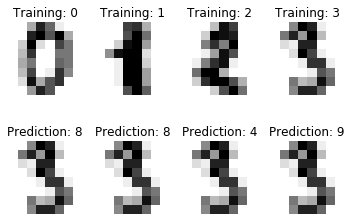

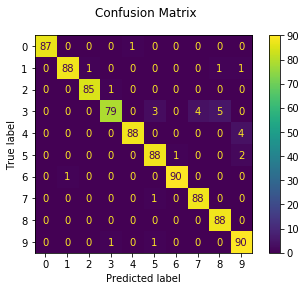

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma = 0.001)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.5, shuffle = False)

classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (images, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("Classification report for classifier %s\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [18]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y = True)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [20]:
y[0]

0

In [21]:
from joblib import dump, load
dump(clf, 'filename.joblib')

['filename.joblib']

In [22]:
clf = load('filename.joblib')

In [23]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype = 'float32')
X.dtype

dtype('float32')

In [24]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [25]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [27]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(return_X_y = True)
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [32]:
clf.set_params(kernel='rbf').fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [34]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [35]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])